In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
weather_data = pd.read_csv("Boise_rainfall_stats.csv", skipfooter = 3, skiprows = 0, header = 1, engine = "python", index_col = "Date", parse_dates = ["Date"], usecols = [0,2,5,8,11,14,16]) 


In [3]:
source1 = pd.read_csv("Boise_rainfall_stats.csv")
source1.iloc[-1,0]

'Boise, ID Weather History | Weather Underground (wunderground.com) https://www.wunderground.com/history/monthly/us/id/boise/KBOI/date/2022-9'

In [4]:
weather_data.head(2)

,Avg,Avg.1,Avg.2,Avg.3,Avg.4,Total
Date,,,,,,
2020-09-01,66.8,41.3,42.6,5.8,27.1,0.0
2020-09-02,76.3,41.9,32.8,6.0,27.1,0.0


In [5]:
weather_data.rename(columns = {'Date':'Date', 'Avg':'Temp_Avg', 'Avg.1':'Dew_Pt_Avg', 'Avg.2':'Humidity_Avg', 'Avg.3':'Wind_Speed_Avg', 'Avg.4':'Pressure_Avg', 'Total':'Precipitation'}, inplace = True)

In [6]:
weather_data

,Temp_Avg,Dew_Pt_Avg,Humidity_Avg,Wind_Speed_Avg,Pressure_Avg,Precipitation
Date,,,,,,
2020-09-01,66.8,41.3,42.6,5.8,27.1,0.00
2020-09-02,76.3,41.9,32.8,6.0,27.1,0.00
2020-09-03,77.4,40.5,28.3,6.4,27.1,0.00
2020-09-04,82.2,37.9,23.3,7.2,27.1,0.00
2020-09-05,82.6,38.2,22.1,7.2,27.1,0.00
...,...,...,...,...,...,...
2022-09-11,70.3,27.9,22.8,6.6,27.1,0.00
2022-09-12,70.9,30.2,22.8,7.0,27.0,0.00
2022-09-13,69.1,49.5,51.2,7.0,26.9,0.00


In [7]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 745 entries, 2020-09-01 to 2022-09-15
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temp_Avg        745 non-null    float64
 1   Dew_Pt_Avg      745 non-null    float64
 2   Humidity_Avg    745 non-null    float64
 3   Wind_Speed_Avg  745 non-null    float64
 4   Pressure_Avg    745 non-null    float64
 5   Precipitation   744 non-null    float64
dtypes: float64(6)
memory usage: 40.7 KB


In [8]:
moon = pd.read_excel("Moon_Phases_rev.xlsx", header = None, skipfooter = 2, names = ["Date", "Moon_Phase"])
moon.head()

,Date,Moon_Phase
0,2020-08-18,New Moon
1,2020-08-25,First Quarter
2,2020-09-01,Full Moon
3,2020-09-10,Third Quarter
4,2020-09-17,New Moon


In [9]:
source2 = pd.read_excel("Moon_Phases_rev.xlsx")
source2.iloc[-1,0]

'Moon Phases 2022 – Lunar Calendar for Boise, Idaho, USA (timeanddate.com)'

In [10]:
moon.set_index("Date", inplace = True)
moon.head()

,Moon_Phase
Date,
2020-08-18,New Moon
2020-08-25,First Quarter
2020-09-01,Full Moon
2020-09-10,Third Quarter
2020-09-17,New Moon


In [11]:
moon.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 108 entries, 2020-08-18 to 2022-10-17
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Moon_Phase  108 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


In [12]:
weather_data = pd.merge(weather_data, moon, how = "outer", right_index = True, left_index = True)
weather_data

,Temp_Avg,Dew_Pt_Avg,Humidity_Avg,Wind_Speed_Avg,Pressure_Avg,Precipitation,Moon_Phase
Date,,,,,,,
2020-08-18,NaN,NaN,NaN,NaN,NaN,NaN,New Moon
2020-08-25,NaN,NaN,NaN,NaN,NaN,NaN,First Quarter
2020-09-01,66.8,41.3,42.6,5.8,27.1,0.0,Full Moon
2020-09-02,76.3,41.9,32.8,6.0,27.1,0.0,NaN
2020-09-03,77.4,40.5,28.3,6.4,27.1,0.0,NaN
...,...,...,...,...,...,...,...
2022-09-17,NaN,NaN,NaN,NaN,NaN,NaN,Third Quarter
2022-09-25,NaN,NaN,NaN,NaN,NaN,NaN,New Moon
2022-10-02,NaN,NaN,NaN,NaN,NaN,NaN,First Quarter


In [13]:
weather_data = weather_data.iloc[2:]

In [14]:
weather_data.head(5)

,Temp_Avg,Dew_Pt_Avg,Humidity_Avg,Wind_Speed_Avg,Pressure_Avg,Precipitation,Moon_Phase
Date,,,,,,,
2020-09-01,66.8,41.3,42.6,5.8,27.1,0.0,Full Moon
2020-09-02,76.3,41.9,32.8,6.0,27.1,0.0,NaN
2020-09-03,77.4,40.5,28.3,6.4,27.1,0.0,NaN
2020-09-04,82.2,37.9,23.3,7.2,27.1,0.0,NaN
2020-09-05,82.6,38.2,22.1,7.2,27.1,0.0,NaN


In [15]:
weather_data.loc[:,"Moon_Phase"] = weather_data.loc[:,"Moon_Phase"].ffill()
weather_data

C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Temp_Avg,Dew_Pt_Avg,Humidity_Avg,Wind_Speed_Avg,Pressure_Avg,Precipitation,Moon_Phase
Date,,,,,,,
2020-09-01,66.8,41.3,42.6,5.8,27.1,0.0,Full Moon
2020-09-02,76.3,41.9,32.8,6.0,27.1,0.0,Full Moon
2020-09-03,77.4,40.5,28.3,6.4,27.1,0.0,Full Moon
2020-09-04,82.2,37.9,23.3,7.2,27.1,0.0,Full Moon
2020-09-05,82.6,38.2,22.1,7.2,27.1,0.0,Full Moon
...,...,...,...,...,...,...,...
2022-09-17,NaN,NaN,NaN,NaN,NaN,NaN,Third Quarter
2022-09-25,NaN,NaN,NaN,NaN,NaN,NaN,New Moon
2022-10-02,NaN,NaN,NaN,NaN,NaN,NaN,First Quarter


In [16]:
one_hot = pd.get_dummies(weather_data["Moon_Phase"], drop_first = True)
one_hot

,Full Moon,New Moon,Third Quarter
Date,,,
2020-09-01,1,0,0
2020-09-02,1,0,0
2020-09-03,1,0,0
2020-09-04,1,0,0
2020-09-05,1,0,0
...,...,...,...
2022-09-17,0,0,1
2022-09-25,0,1,0
2022-10-02,0,0,0


In [17]:
weather_data = weather_data.drop("Moon_Phase", axis =1)

In [18]:
weather_data = weather_data.join(one_hot)

In [19]:
weather_data

,Temp_Avg,Dew_Pt_Avg,Humidity_Avg,Wind_Speed_Avg,Pressure_Avg,Precipitation,Full Moon,New Moon,Third Quarter
Date,,,,,,,,,
2020-09-01,66.8,41.3,42.6,5.8,27.1,0.0,1,0,0
2020-09-02,76.3,41.9,32.8,6.0,27.1,0.0,1,0,0
2020-09-03,77.4,40.5,28.3,6.4,27.1,0.0,1,0,0
2020-09-04,82.2,37.9,23.3,7.2,27.1,0.0,1,0,0
2020-09-05,82.6,38.2,22.1,7.2,27.1,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...
2022-09-17,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
2022-09-25,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
2022-10-02,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0


In [20]:
sunspot_num = pd.read_excel("Sunspot_Number.xlsx", skipfooter = 2, header = 0, usecols = [0,5], parse_dates = True, index_col = "Date")#, index_col = "D)

In [21]:
source3 = pd.read_excel("Sunspot_Number.xlsx")
source3.iloc[-1,0]

'Source:  https://www.sidc.be/silso/datafiles#total'

In [22]:
sunspot_num.rename(columns = {"Total Number":"Sunspot_Number"}, inplace = True)

In [23]:
sunspot_num

,Sunspot_Number
Date,
2020-09-01,0
2020-09-02,0
2020-09-03,0
2020-09-04,0
2020-09-05,0
...,...
2022-08-27,94
2022-08-28,85
2022-08-29,71


In [24]:
sunspot_num.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2020-09-01 to 2022-08-31
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Sunspot_Number  730 non-null    int64
dtypes: int64(1)
memory usage: 11.4 KB


In [25]:
weather_data = pd.merge(weather_data, sunspot_num, how = "outer", right_index = True, left_index = True)
weather_data.tail(25)

,Temp_Avg,Dew_Pt_Avg,Humidity_Avg,Wind_Speed_Avg,Pressure_Avg,Precipitation,Full Moon,New Moon,Third Quarter,Sunspot_Number
Date,,,,,,,,,,
2022-08-27,74.5,42.8,33.5,7.8,26.9,0.00,0,1,0,94.0
2022-08-28,69.5,31.9,27.2,6.0,26.9,0.00,0,1,0,85.0
2022-08-29,76.6,35.3,24.6,4.6,27.0,0.00,0,1,0,71.0
2022-08-30,81.2,38.5,23.8,6.0,27.1,0.00,0,1,0,49.0
2022-08-31,87.3,37.2,18.7,6.8,27.0,0.00,0,1,0,44.0
2022-09-01,80.7,36.3,25.1,5.8,27.0,0.00,0,1,0,NaN
2022-09-02,81.6,22.0,13.8,6.0,27.0,0.00,0,1,0,NaN
2022-09-03,84.3,29.5,14.9,7.8,27.0,0.00,0,0,0,NaN
2022-09-04,79.3,37.0,25.3,5.3,27.0,0.00,0,0,0,NaN


In [26]:
mean_ss = weather_data.Sunspot_Number.mean()
mean_ss = round(mean_ss,0)

In [27]:
weather_data.loc[:,"Sunspot_Number"] = weather_data.loc[:,"Sunspot_Number"].fillna(mean_ss)
weather_data

,Temp_Avg,Dew_Pt_Avg,Humidity_Avg,Wind_Speed_Avg,Pressure_Avg,Precipitation,Full Moon,New Moon,Third Quarter,Sunspot_Number
Date,,,,,,,,,,
2020-09-01,66.8,41.3,42.6,5.8,27.1,0.0,1,0,0,0.0
2020-09-02,76.3,41.9,32.8,6.0,27.1,0.0,1,0,0,0.0
2020-09-03,77.4,40.5,28.3,6.4,27.1,0.0,1,0,0,0.0
2020-09-04,82.2,37.9,23.3,7.2,27.1,0.0,1,0,0,0.0
2020-09-05,82.6,38.2,22.1,7.2,27.1,0.0,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
2022-09-17,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,43.0
2022-09-25,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,43.0
2022-10-02,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,43.0


In [28]:
weather_data = weather_data.iloc[0:-5,:]
weather_data

,Temp_Avg,Dew_Pt_Avg,Humidity_Avg,Wind_Speed_Avg,Pressure_Avg,Precipitation,Full Moon,New Moon,Third Quarter,Sunspot_Number
Date,,,,,,,,,,
2020-09-01,66.8,41.3,42.6,5.8,27.1,0.00,1,0,0,0.0
2020-09-02,76.3,41.9,32.8,6.0,27.1,0.00,1,0,0,0.0
2020-09-03,77.4,40.5,28.3,6.4,27.1,0.00,1,0,0,0.0
2020-09-04,82.2,37.9,23.3,7.2,27.1,0.00,1,0,0,0.0
2020-09-05,82.6,38.2,22.1,7.2,27.1,0.00,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
2022-09-11,70.3,27.9,22.8,6.6,27.1,0.00,1,0,0,43.0
2022-09-12,70.9,30.2,22.8,7.0,27.0,0.00,1,0,0,43.0
2022-09-13,69.1,49.5,51.2,7.0,26.9,0.00,1,0,0,43.0


In [29]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 745 entries, 2020-09-01 to 2022-09-15
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temp_Avg        745 non-null    float64
 1   Dew_Pt_Avg      745 non-null    float64
 2   Humidity_Avg    745 non-null    float64
 3   Wind_Speed_Avg  745 non-null    float64
 4   Pressure_Avg    745 non-null    float64
 5   Precipitation   744 non-null    float64
 6   Full Moon       745 non-null    uint8  
 7   New Moon        745 non-null    uint8  
 8   Third Quarter   745 non-null    uint8  
 9   Sunspot_Number  745 non-null    float64
dtypes: float64(7), uint8(3)
memory usage: 48.7 KB


In [30]:
#This fills in all the null values with the average. It seemed to throw the number of
#days of precipitation off.
# def fill_nan(df):
#     for col in df.columns[df.isnull().any(axis=0)]:
#         df[col].fillna(weather_data[col].mean(),inplace=True)
#     return round(df,0)

# weather_data = fill_nan(weather_data)

In [31]:
weather_data.to_csv("Boise_rainfall_data.csv")

In [32]:
weather_data.Precipitation.loc[weather_data.Precipitation > 0]

Date
2020-09-26    0.03
2020-10-11    0.38
2020-10-25    0.03
2020-11-02    0.16
2020-11-05    0.03
              ... 
2022-07-20    0.04
2022-08-03    0.01
2022-08-11    0.04
2022-08-20    0.04
2022-09-14    0.07
Name: Precipitation, Length: 155, dtype: float64

In [33]:
weather_data.loc[weather_data.Precipitation > 0, "Precipitation"] = 1

C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [34]:
weather_data

,Temp_Avg,Dew_Pt_Avg,Humidity_Avg,Wind_Speed_Avg,Pressure_Avg,Precipitation,Full Moon,New Moon,Third Quarter,Sunspot_Number
Date,,,,,,,,,,
2020-09-01,66.8,41.3,42.6,5.8,27.1,0.0,1,0,0,0.0
2020-09-02,76.3,41.9,32.8,6.0,27.1,0.0,1,0,0,0.0
2020-09-03,77.4,40.5,28.3,6.4,27.1,0.0,1,0,0,0.0
2020-09-04,82.2,37.9,23.3,7.2,27.1,0.0,1,0,0,0.0
2020-09-05,82.6,38.2,22.1,7.2,27.1,0.0,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
2022-09-11,70.3,27.9,22.8,6.6,27.1,0.0,1,0,0,43.0
2022-09-12,70.9,30.2,22.8,7.0,27.0,0.0,1,0,0,43.0
2022-09-13,69.1,49.5,51.2,7.0,26.9,0.0,1,0,0,43.0


In [35]:
#May add wheat futures (see what traders think the rainfall will be - 
#the world market will do since farmers sell into the international market)
#From here on down I need to evaluate the results.  Data is now for two years. 

In [36]:
weather_data.Precipitation.loc[weather_data.Precipitation == 1].sum()

155.0

In [37]:
weather_data

,Temp_Avg,Dew_Pt_Avg,Humidity_Avg,Wind_Speed_Avg,Pressure_Avg,Precipitation,Full Moon,New Moon,Third Quarter,Sunspot_Number
Date,,,,,,,,,,
2020-09-01,66.8,41.3,42.6,5.8,27.1,0.0,1,0,0,0.0
2020-09-02,76.3,41.9,32.8,6.0,27.1,0.0,1,0,0,0.0
2020-09-03,77.4,40.5,28.3,6.4,27.1,0.0,1,0,0,0.0
2020-09-04,82.2,37.9,23.3,7.2,27.1,0.0,1,0,0,0.0
2020-09-05,82.6,38.2,22.1,7.2,27.1,0.0,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
2022-09-11,70.3,27.9,22.8,6.6,27.1,0.0,1,0,0,43.0
2022-09-12,70.9,30.2,22.8,7.0,27.0,0.0,1,0,0,43.0
2022-09-13,69.1,49.5,51.2,7.0,26.9,0.0,1,0,0,43.0


### Correlation and plots

The data below indicates the negative correlation of pressure and temperature to precipitation, and scatterplots of each average showing need for logistic regression.

In [38]:
weather_data.corr()["Precipitation"].sort_values(ascending = False)

Precipitation     1.000000
Humidity_Avg      0.459072
Dew_Pt_Avg        0.062109
Wind_Speed_Avg    0.052539
New Moon          0.040127
Full Moon         0.019957
Sunspot_Number   -0.020947
Third Quarter    -0.079266
Pressure_Avg     -0.090081
Temp_Avg         -0.273227
Name: Precipitation, dtype: float64

<AxesSubplot:xlabel='Pressure_Avg', ylabel='Precipitation'>

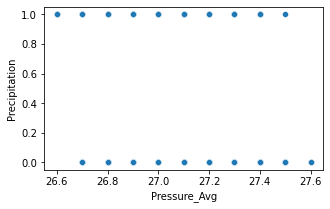

In [39]:
plt.figure(figsize = (5,3))
sns.scatterplot(x = "Pressure_Avg", y = "Precipitation", data = weather_data)

<AxesSubplot:xlabel='Wind_Speed_Avg', ylabel='Precipitation'>

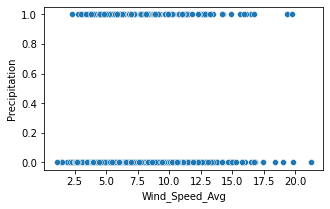

In [40]:
plt.figure(figsize = (5,3))
sns.scatterplot(x = "Wind_Speed_Avg", y = "Precipitation", data = weather_data)

<AxesSubplot:xlabel='Wind_Speed_Avg', ylabel='Precipitation'>

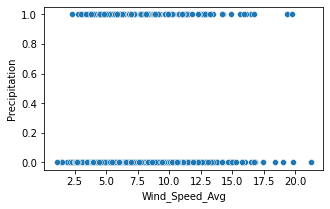

In [41]:
plt.figure(figsize = (5,3))
sns.scatterplot(x = "Wind_Speed_Avg", y = "Precipitation", data = weather_data)

<AxesSubplot:xlabel='Humidity_Avg', ylabel='Precipitation'>

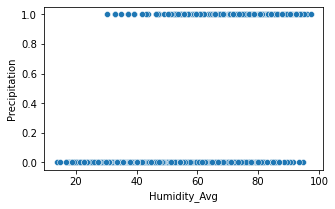

In [42]:
plt.figure(figsize = (5,3))
sns.scatterplot(x = "Humidity_Avg", y = "Precipitation", data = weather_data)

In [43]:
precip_days = weather_data.loc[weather_data.Precipitation >0]
precip_days

,Temp_Avg,Dew_Pt_Avg,Humidity_Avg,Wind_Speed_Avg,Pressure_Avg,Precipitation,Full Moon,New Moon,Third Quarter,Sunspot_Number
Date,,,,,,,,,,
2020-09-26,60.0,46.2,63.4,8.0,27.1,1.0,0,0,0,0.0
2020-10-11,50.8,37.3,62.1,6.2,27.1,1.0,0,0,1,20.0
2020-10-25,33.0,12.6,47.3,11.2,27.2,1.0,0,0,0,19.0
2020-11-02,51.7,45.6,81.1,3.1,27.2,1.0,1,0,0,9.0
2020-11-05,53.4,34.3,52.3,11.3,27.0,1.0,1,0,0,31.0
...,...,...,...,...,...,...,...,...,...,...
2022-07-20,82.3,51.8,37.3,7.0,26.9,1.0,0,0,1,133.0
2022-08-03,75.7,45.0,32.9,5.7,27.0,1.0,0,1,0,37.0
2022-08-11,83.7,54.6,39.2,5.9,27.1,1.0,1,0,0,72.0


### Logistic Regression

In [44]:
X = weather_data.drop("Precipitation", axis = 1)
X

,Temp_Avg,Dew_Pt_Avg,Humidity_Avg,Wind_Speed_Avg,Pressure_Avg,Full Moon,New Moon,Third Quarter,Sunspot_Number
Date,,,,,,,,,
2020-09-01,66.8,41.3,42.6,5.8,27.1,1,0,0,0.0
2020-09-02,76.3,41.9,32.8,6.0,27.1,1,0,0,0.0
2020-09-03,77.4,40.5,28.3,6.4,27.1,1,0,0,0.0
2020-09-04,82.2,37.9,23.3,7.2,27.1,1,0,0,0.0
2020-09-05,82.6,38.2,22.1,7.2,27.1,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...
2022-09-11,70.3,27.9,22.8,6.6,27.1,1,0,0,43.0
2022-09-12,70.9,30.2,22.8,7.0,27.0,1,0,0,43.0
2022-09-13,69.1,49.5,51.2,7.0,26.9,1,0,0,43.0


In [45]:
y = weather_data["Precipitation"]
y

Date
2020-09-01    0.0
2020-09-02    0.0
2020-09-03    0.0
2020-09-04    0.0
2020-09-05    0.0
             ... 
2022-09-11    0.0
2022-09-12    0.0
2022-09-13    0.0
2022-09-14    1.0
2022-09-15    0.0
Name: Precipitation, Length: 745, dtype: float64

In [46]:
from sklearn.model_selection import train_test_split

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
...

In [50]:
scaler = StandardScaler()

In [51]:
scaled_X_train = scaler.fit_transform(X_train) 

In [52]:
scaled_X_test = scaler.transform(X_test)

In [53]:
y_test

Date
2022-02-24    0.0
2020-10-13    0.0
2022-04-29    1.0
2021-07-15    0.0
2021-03-24    0.0
             ... 
2021-11-27    0.0
2021-07-21    1.0
2021-12-13    1.0
2022-04-16    1.0
2021-07-17    0.0
Name: Precipitation, Length: 149, dtype: float64

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
log_model = LogisticRegression()

In [56]:
np.any(np.isnan(weather_data))

True

In [57]:
np.all(np.isfinite(weather_data))

False

In [58]:
log_model.fit(scaled_X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
y_pred_pr = log_model.predict_proba(scaled_X_test)

In [ ]:
y_pred_pr

In [ ]:
log_model.coef_

The log_model.coef indicates that for each feature, the corresponding coefficient indicates the probability that there would be precipitation, i.e if Temp_Avg rises by 1 unit, the probability of precipitation decreases, if Dew_Pt_Average increases by 1 unit, the probability of precipitation increases, and so on for each feature.¶

In [ ]:
X.columns

In [ ]:
X_test

### Regression metrics¶

In [ ]:
from sklearn.metrics import classification_report

This report gives the probability of a 1 in the precipitation column using three different categories - precision, recall and f1-score. Precision is accuracy, recall is ratio of class to total, f1 score is mean of precision & recall.

In [ ]:
y_pred = log_model.predict(scaled_X_test)
y_pred

In [ ]:
print(classification_report(y_test, y_pred))

### Visualization

This chart shows the exact opposite of what I would expect. Pressure and temperature would drop if rain is expected, and this is confirmed by the correlation above. I altered the visualization to show the pressure and temperature in blue at th top, I'm not sure how to fix the negative results

In [ ]:
coeff = list(log_model.coef_[0])
labels = list(X_train.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=False, inplace=True)
features['negative'] = features['importance'] < 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.negative.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')
plt.show()